In [1]:
#Fancy indexing

In [2]:
#Exploring Fancy Indexing

In [3]:
import numpy as np

In [4]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [5]:
ind = np.array([[3, 7],
[4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [6]:
#Fancy indexing also works in multiple dimensions.
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [9]:
X[row[:, np.newaxis], col]


array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [10]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [16]:
c=np.array([4,5,6])
d=np.arange(3)[:, np.newaxis]
print(c)
print(d)

[4 5 6]
[[0]
 [1]
 [2]]


In [17]:
#combined indexing

In [18]:
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [19]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [20]:
#We can combine fancy and simple indices:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [21]:
#fancy + slicing
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [22]:
#fancy + masking
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [23]:
#selecting random poits
mean = [0, 0]
cov = [[1, 2],
[2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling
plt.scatter(X[:, 0], X[:, 1]);

ModuleNotFoundError: No module named 'seaborn'

In [25]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([32, 50, 99, 68, 10, 79, 96, 27, 78, 62, 60, 47, 91, 93,  2, 25, 29,
       28,  1, 59])

In [27]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

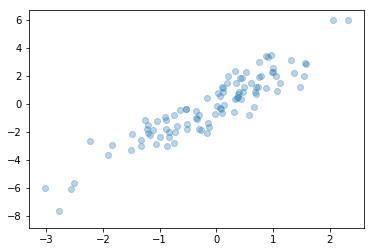

In [28]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
facecolor='none', s=200);

In [1]:
#Modifying Values with Fancy Indexing

In [3]:
import numpy as np

In [5]:
#set the corresponding items in an array to some value:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [7]:
#using assignment operator
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [9]:
x[i] +=20
print(x)

[  0 109 109   3 109   5   6   7 109   9]


In [10]:
y=np.arange(12,100,12)
j=np.array([4,7,2])
y[j]=10
print(y)

[12 24 10 48 10 72 84 10]


In [18]:
z=np.random.random((10))
k=np.array([1,3,8,9])
z[k]=0.00000000001
print(z)

[7.80492110e-01 1.00000000e-11 7.87944013e-01 1.00000000e-11
 3.15423834e-01 8.91679758e-01 3.39258793e-01 9.84123631e-01
 1.00000000e-11 1.00000000e-11]


In [19]:
#Notice, though, that repeated indices with these operations can cause some potentially
#unexpected results
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [21]:
#using the at() method of ufuncs
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [22]:
t = np.zeros(10)
np.add.at(t, i, 1)
print(t)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [23]:
#Binning data

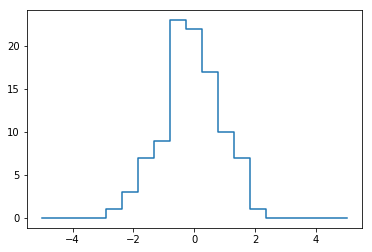

In [26]:
#to efficiently bin data to create a histogram by hand
import matplotlib.pyplot as plt
np.random.seed(42)
x = np.random.randn(100)
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
# find the appropriate bin for each x
i = np.searchsorted(bins, x)
# add 1 to each of these bins
np.add.at(counts, i, 1)
# plot the results
plt.plot(bins, counts, linestyle='steps');

In [28]:
y=np.random.seed(42)
print(y)

None


In [29]:
x = np.random.randn(100)
print(x)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

In [30]:
bins = np.linspace(-5, 5, 20)
print (bins)

[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]


In [31]:
counts = np.zeros_like(bins)
print(counts)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
count = np.zeros_like(bins)
np.add.at(count, i, 1)
print(count)

[ 0.  0.  0.  0.  0.  1.  3.  7.  9. 23. 22. 17. 10.  7.  1.  0.  0.  0.
  0.  0.]


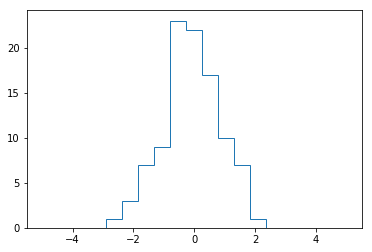

In [34]:
#to easily plot in matpotlib
plt.hist(x, bins, histtype='step');

In [35]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
58 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
28.6 µs ± 173 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [39]:
np.histogram(x, bins,"step");

In [40]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
96.8 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
201 ms ± 4.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
1+2

3